In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
archAuctions=pd.read_csv('auctions.csv.gzip',compression='gzip',low_memory=False)

In [4]:
archAuctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [73]:
archClicks=pd.read_csv('clicks.csv.gzip',compression='gzip',low_memory=False)

In [6]:
archClicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [9]:
#cambiamos el formato object a formato fechas
archAuctions.loc[:,'date'] = pd.to_datetime(archAuctions['date'], errors='coerce')

In [10]:
archAuctions.dtypes

auction_type_id           float64
country                     int64
date               datetime64[ns]
device_id                   int64
platform                    int64
ref_type_id                 int64
source_id                   int64
dtype: object

In [11]:
archAuctions.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [20]:
archAuctions.count()

auction_type_id           0
country            19571319
date               19571319
device_id          19571319
platform           19571319
ref_type_id        19571319
source_id          19571319
dtype: int64

In [14]:
archAuctions.isnull().sum()

auction_type_id    19571319
country                   0
date                      0
device_id                 0
platform                  0
ref_type_id               0
source_id                 0
dtype: int64

# Ejercicio 1:
# Sobre el archivo auctions.csv queremos encontrar los 5 dispositivos que más participaron en subastas. Para esos 5 dispositivos, queremos visualizar la evolución en el tiempo de la cantidad de subastas.
***
Como podemos ver en la columna de tipos de subastas existen filas o datos nan pero como no implica en lo que se pide podemos tomar esas filas como validas.
Entonces nos quedamos con las columnas date y device_id que seran necesarios para resolver el ejercicio.


In [12]:
dispositivo_date=archAuctions[['date','device_id']]
dispositivo_date.head()

,date,device_id
0,2019-03-11 14:18:33.290763,6059599345986491085
1,2019-03-11 14:18:34.440157,1115994996230693426
2,2019-03-11 14:18:35.862360,7463856250762200923
3,2019-03-11 14:18:36.167163,7829815350267792040
4,2019-03-11 14:18:37.728590,1448534231953777480


In [13]:
dispositivo_date.isnull().sum()

date         0
device_id    0
dtype: int64

In [23]:
#PRIMERA PARTE
dispo_subastas=dispositivo_date['device_id'].value_counts()
dispo_subastas.head(5)

633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

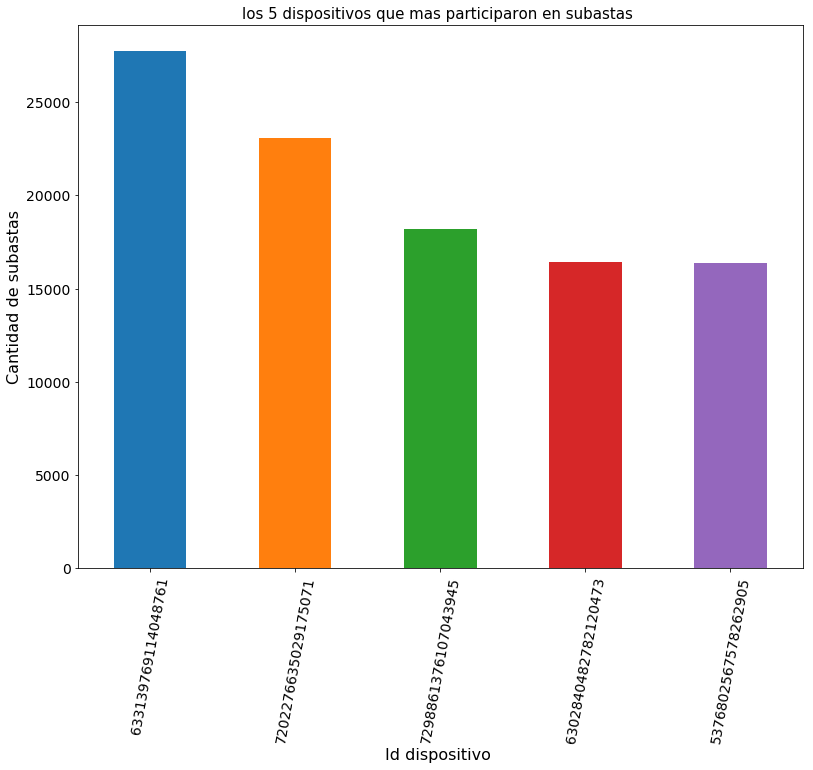

In [26]:
f = plt.figure()

grafhist=dispo_subastas.head(5)

plt.title('los 5 dispositivos que mas participaron en subastas ', color='black',fontsize=15)

ax=grafhist.plot(kind='bar',rot=80,figsize=(13,10),fontsize=14);

ax.set_ylabel('Cantidad de subastas',fontsize=16);
ax.set_xlabel('Id dispositivo ',fontsize=16);


In [39]:
top5=[633139769114048761,7202276635029175071,7298861376107043945,6302840482782120473,5376802567578262905 ]
top5Dispo=dispositivo_date[dispositivo_date['device_id'].isin(top5)]
top5Dispo.head()

,date,device_id
12655,2019-03-12 03:02:37.264242,7298861376107043945
12857,2019-03-12 03:40:56.976592,7298861376107043945
12890,2019-03-12 03:41:40.257843,7298861376107043945
12940,2019-03-12 03:43:01.529164,7298861376107043945
13109,2019-03-12 03:49:58.483260,633139769114048761


In [40]:
top5Dispo['fecha'] = [d.date() for d in top5Dispo['date']] 
top5Dispo['hora'] = [d.time() for d in top5Dispo['date']] 
top5Dispo.head()

/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,date,device_id,fecha,hora
12655,2019-03-12 03:02:37.264242,7298861376107043945,2019-03-12,03:02:37.264242
12857,2019-03-12 03:40:56.976592,7298861376107043945,2019-03-12,03:40:56.976592
12890,2019-03-12 03:41:40.257843,7298861376107043945,2019-03-12,03:41:40.257843
12940,2019-03-12 03:43:01.529164,7298861376107043945,2019-03-12,03:43:01.529164
13109,2019-03-12 03:49:58.483260,633139769114048761,2019-03-12,03:49:58.483260


In [41]:
top5Dispo_PorFecha=top5Dispo[['device_id','fecha']]
top5Dispo_PorFecha.head()

,device_id,fecha
12655,7298861376107043945,2019-03-12
12857,7298861376107043945,2019-03-12
12890,7298861376107043945,2019-03-12
12940,7298861376107043945,2019-03-12
13109,633139769114048761,2019-03-12


In [47]:
top5Dispo_PorFecha.fecha.unique()

array([datetime.date(2019, 3, 12), datetime.date(2019, 3, 7),
       datetime.date(2019, 3, 8), datetime.date(2019, 3, 9),
       datetime.date(2019, 3, 11), datetime.date(2019, 3, 10),
       datetime.date(2019, 3, 13), datetime.date(2019, 3, 5),
       datetime.date(2019, 3, 6)], dtype=object)

In [50]:
top5Dispo_PorFecha.head()

,device_id,fecha,cantidad
12655,7298861376107043945,2019-03-12,1
12857,7298861376107043945,2019-03-12,1
12890,7298861376107043945,2019-03-12,1
12940,7298861376107043945,2019-03-12,1
13109,633139769114048761,2019-03-12,1


In [53]:
tabla=pd.pivot_table(top5Dispo_PorFecha, values='cantidad', columns='device_id', index='fecha',aggfunc=np.sum)
tabla

device_id,633139769114048761,5376802567578262905,6302840482782120473,7202276635029175071,7298861376107043945
fecha,,,,,
2019-03-05,2255,122,4,875,640
2019-03-06,224,121,28,512,1251
2019-03-07,1877,1053,2191,2933,1316
2019-03-08,1865,2227,2233,2949,1903
2019-03-09,2054,1942,2798,2676,1952
2019-03-10,5777,3315,3623,3414,1459
2019-03-11,4829,2272,792,3157,3345
2019-03-12,4625,1902,1689,2217,2757
2019-03-13,4256,3413,3042,4322,3565


/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


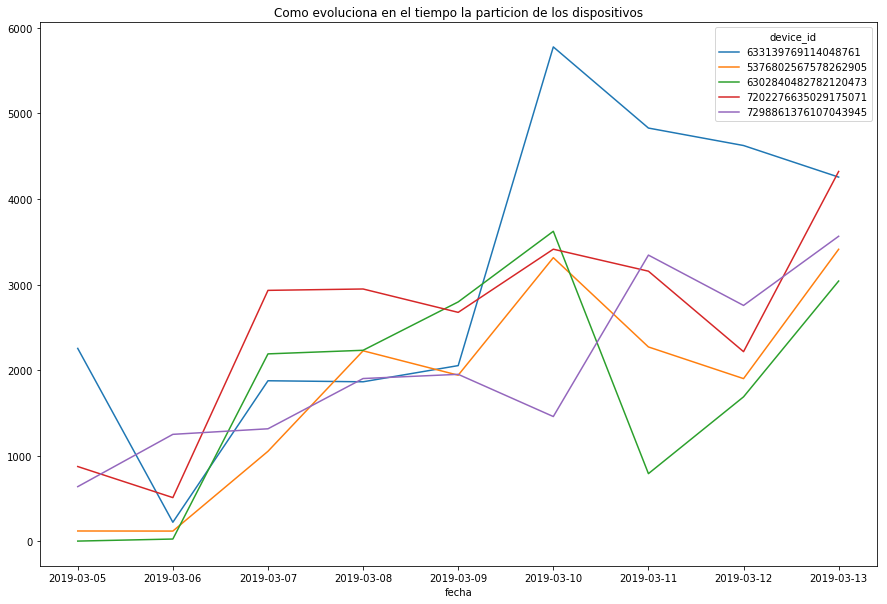

In [126]:
top5Dispo_PorFecha['cantidad']=1
pd.pivot_table(top5Dispo_PorFecha, values='cantidad', columns='device_id', index='fecha',aggfunc=np.sum).\
    plot(title='Como evoluciona en el tiempo la particion de los dispositivos', figsize=(15,10));

# Ejercicio 2
# Encontrar en qué horario (si es que lo hay) se suele registrar la mayor cantidad de clicks. Armar una visualización que muestre los resultados obtenidos

In [74]:
#cambiamos el formato object a formato fechas
archClicks.loc[:,'created'] = pd.to_datetime(archClicks['created'], errors='coerce')

In [75]:
archClicks.dtypes

advertiser_id               int64
action_id                 float64
source_id                   int64
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection              bool
carrier_id                float64
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand                 int64
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                    int64
ref_hash                    int64
dtype: object

In [88]:
archClicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [109]:
#nos quedamos con la created que nos brinda los datos de fecha y hora que se crean los clicks
creacionClick=archClicks[['created']]
creacionClick.head()

,created
0,2019-03-06 22:42:12.755
1,2019-03-08 10:24:30.641
2,2019-03-08 15:24:16.069
3,2019-03-06 03:08:51.543
4,2019-03-06 03:32:55.570


In [110]:
creacionClick['created'].value_counts().head()


2019-03-10 05:02:10.703    2
2019-03-07 23:24:46.085    2
2019-03-10 01:37:34.402    2
2019-03-07 23:16:30.731    2
2019-03-09 05:15:41.059    1
Name: created, dtype: int64

In [111]:
creacionClick['created']= pd.to_datetime(creacionClick['created'],errors='coerce')
creacionClick['hour']=creacionClick['created'].map(lambda x:x.hour)
creacionClick['minute']=creacionClick['created'].map(lambda x:x.minute)
creacionClick.head()

/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,created,hour,minute
0,2019-03-06 22:42:12.755,22,42
1,2019-03-08 10:24:30.641,10,24
2,2019-03-08 15:24:16.069,15,24
3,2019-03-06 03:08:51.543,3,8
4,2019-03-06 03:32:55.570,3,32


In [114]:
creacionClick['fecha'] = [d.date() for d in creacionClick['created']] 
creacionClick.head()

/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,created,hour,minute,fecha
0,2019-03-06 22:42:12.755,22,42,2019-03-06
1,2019-03-08 10:24:30.641,10,24,2019-03-08
2,2019-03-08 15:24:16.069,15,24,2019-03-08
3,2019-03-06 03:08:51.543,3,8,2019-03-06
4,2019-03-06 03:32:55.570,3,32,2019-03-06


In [116]:
creacionClick.dtypes

created    datetime64[ns]
hour                int64
minute              int64
fecha              object
dtype: object

In [72]:
creacionClick.fecha.unique()

array([datetime.date(2019, 3, 6), datetime.date(2019, 3, 8),
       datetime.date(2019, 3, 7), datetime.date(2019, 3, 12),
       datetime.date(2019, 3, 5), datetime.date(2019, 3, 9),
       datetime.date(2019, 3, 10), datetime.date(2019, 3, 11),
       datetime.date(2019, 3, 13)], dtype=object)

/home/sherly/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


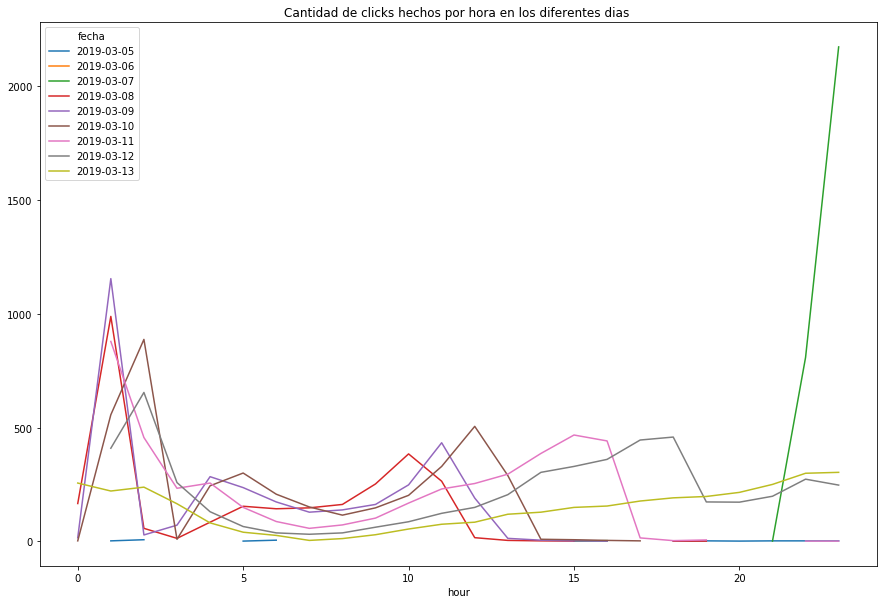

In [122]:
#veremos la cantidad de clicks hechos durante los dias de marzo en las diferentes horas
hora_Fecha=creacionClick[['hour','fecha']]
hora_Fecha['cantidad']=1
pd.pivot_table(hora_Fecha, values='cantidad', columns='fecha', index='hour',aggfunc=np.sum).plot(title='Cantidad de clicks hechos por hora en los diferentes dias ',figsize=(15,10));

In [118]:
tabla_hora_fecha=pd.pivot_table(hora_Fecha,  values='cantidad', columns='fecha', index='hour',aggfunc=np.sum)
tabla_hora_fecha

fecha,2019-03-05,2019-03-06,2019-03-07,2019-03-08,2019-03-09,2019-03-10,2019-03-11,2019-03-12,2019-03-13
hour,,,,,,,,,
0,NaN,NaN,NaN,166.0,16.0,2.0,NaN,NaN,256.0
1,2.0,1.0,NaN,988.0,1154.0,556.0,878.0,409.0,221.0
2,7.0,NaN,NaN,57.0,28.0,887.0,456.0,654.0,238.0
3,NaN,4.0,1.0,13.0,71.0,9.0,233.0,258.0,165.0
4,NaN,NaN,NaN,84.0,284.0,244.0,256.0,130.0,81.0
5,1.0,NaN,NaN,154.0,236.0,300.0,149.0,65.0,40.0
6,5.0,NaN,NaN,143.0,173.0,207.0,87.0,37.0,26.0
7,NaN,NaN,NaN,147.0,128.0,151.0,57.0,31.0,4.0
8,NaN,NaN,1.0,162.0,138.0,115.0,72.0,37.0,12.0


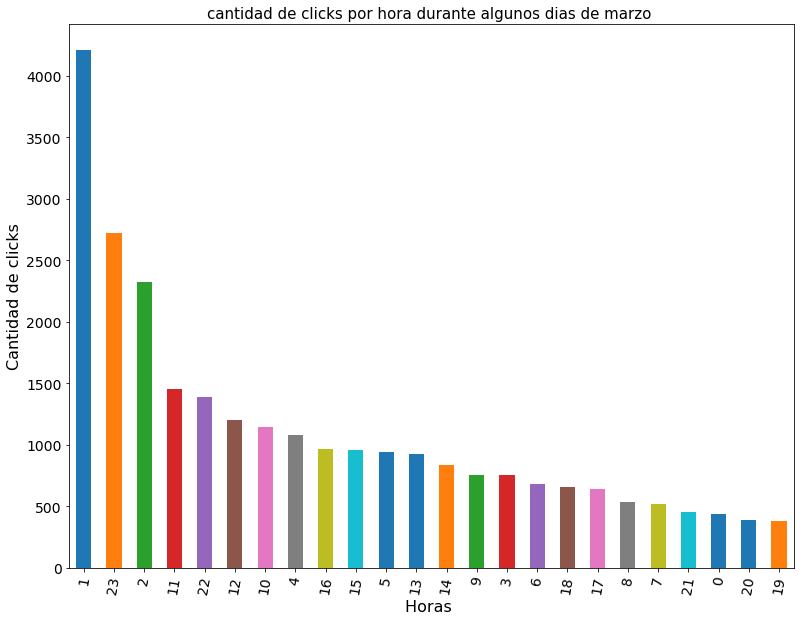

In [123]:
#cantidad de clicks por hora
clicks_hora=creacionClick['hour'].value_counts()
f = plt.figure()

grafhist=clicks_hora

plt.title('cantidad de clicks por hora durante algunos dias de marzo ', color='black',fontsize=15)

ax=grafhist.plot(kind='bar',rot=80,figsize=(13,10),fontsize=14,align='center');

ax.set_ylabel('Cantidad de clicks',fontsize=16);
ax.set_xlabel('Horas ',fontsize=16);

